<a href="https://colab.research.google.com/github/klinkzsweet/PCVK_Genap_2023/blob/main/TaskWeek9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

[[0 1 0]
 [1 1 1]
 [0 1 0]]


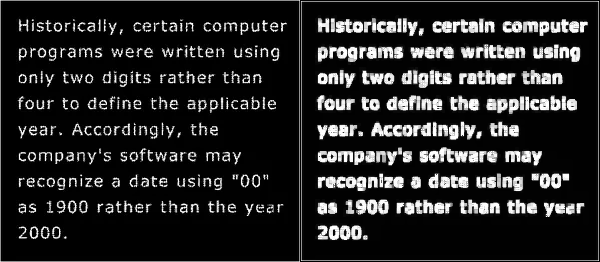

In [20]:
#Buatlah fungsi dilasi serta tampilkan hasil dilasi pada citra dengan Structuring Element
#Dilasi (SED) berbentuk cross 3 x 3 tanpa menggunakan library morphology dari
#openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
#morphology.png)

img = cv2.imread('/content/drive/MyDrive/PCVK/images/morphology.png', cv2.IMREAD_GRAYSCALE)

# Membuat Structuring Element (SED) berbentuk cross 3 x 3
kernel = np.array([[0, 1, 0],
                [1, 1, 1],
                [0, 1, 0]], dtype=np.uint8)

# Membuat gambar kosong untuk menampung hasil dilasi
dilated_img = np.zeros_like(img)

# Mendapatkan ukuran gambar input
height, width = img.shape

# Looping untuk melakukan operasi dilasi
for i in range(1, height-1):
    for j in range(1, width-1):
        # Melakukan dilasi pada setiap piksel pada gambar input
        dilated_pixel = np.max(img[i-1:i+2, j-1:j+2] + kernel)
        dilated_img[i, j] = dilated_pixel
print(kernel)
# Menampilkan gambar hasil dilasi
final_frame = cv2.hconcat((img,dilated_img))
cv2_imshow(final_frame)

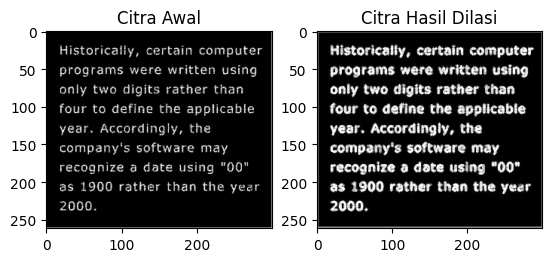

In [21]:
#Buatlah program implementasi operasi dilasi Structuring Element Dilasi (SED)
#berbentuk cross 3 x 3 dengan menggunakan library morphology dari openCV,
#sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
#morphology.png, dan cetak Structuring Element-nya) 

# Membaca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/images/morphology.png')

# Membuat kernel cross dengan ukuran 3x3
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))

# Melakukan dilasi pada citra dengan kernel cross
dilation = cv2.dilate(img, kernel, iterations=1)

# Menampilkan citra awal dan hasil dilasi
plt.subplot(121),plt.imshow(img),plt.title('Citra Awal')
plt.subplot(122),plt.imshow(dilation),plt.title('Citra Hasil Dilasi')
plt.show()

[[1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]
 [1 1 1 1 1]]


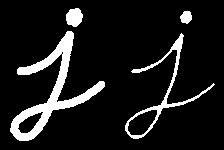

In [27]:
#Buatlah fungsi erosi serta tampilkan hasil erosi pada citra dengan Structuring Element
#Erosi (SE) berbentuk square 5 x 5 tanpa menggunakan library morphology dari
#openCV, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
#j.png) 



img2 = cv2.imread('/content/drive/MyDrive/PCVK/images/j.png', cv2.IMREAD_GRAYSCALE)

se = np.ones((5, 5), dtype=np.uint8)

# Membuat gambar kosong untuk menampung hasil erosi
eroded_img = np.zeros_like(img2)

# Mendapatkan ukuran gambar input
height, width = img2.shape

# Looping untuk melakukan operasi erosi
for i in range(2, height-2):
    for j in range(2, width-2):
        # Melakukan erosi pada setiap piksel pada gambar input
        eroded_pixel = np.min(img2[i-2:i+3, j-2:j+3] * se)
        eroded_img[i, j] = eroded_pixel

print(se)

final_frame = cv2.hconcat((img2,eroded_img))
cv2_imshow(final_frame)

(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

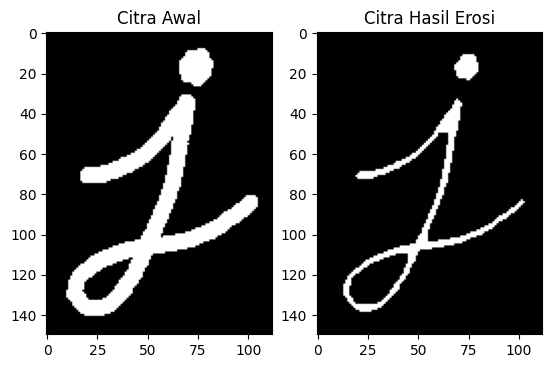

In [24]:
#Buatlah program implementasi operasi dilasi Structuring Element Erosi (SE) berbentuk
#square 5 x 5 dengan menggunakan library morphology dari openCV, sehingga
#menghasilkan tampilan seperti di bawah ini: (Gunakan gambar j.png) 


# Membaca citra
img = cv2.imread('/content/drive/MyDrive/PCVK/images/j.png')

kernel = np.ones((5,5), np.uint8)
erosion = cv2.morphologyEx(img, cv2.MORPH_ERODE, kernel)

plt.subplot(121), plt.imshow(img), plt.title('Citra Awal')
plt.subplot(122), plt.imshow(erosion), plt.title('Citra Hasil Erosi')

<ipython-input-30-317c44f7743a>:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Opening'}>,
 Text(0.5, 1.0, 'Citra Hasil Opening'))

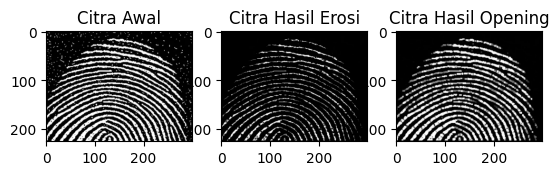

In [30]:
# Membaca image untuk operasi erosi
img7 = cv2.imread('/content/drive/MyDrive/PCVK/images/fingerprint.png', 0)

#Memperoleh ukuran gambar
m, n = img7.shape

#Menampilkan gambar
plt.imshow(img7, cmap="gray")

# Tentukan elemen penataan
# k= 11,15,45 -Ukuran yang berbeda dari elemen penataan
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Definisi gambar baru
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosi tanpa menggunakan fungsi cv2 bawaan untuk morfologi
for i in range(constant, m-constant): #constant adalah tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img7[i-constant:i+constant+1, j-constant:j+constant+1] #temp digunakan untuk menampung atau menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

#Membaca gambar untuk mengetahui pelebarannya
img7_2 = imgErode

#Memperoleh ukuran gambar
p, q= img7_2.shape

#Menampilkan gambar
plt.imshow(img7_2, cmap="gray")

#Menetapkan gambar baru untuk menyimpan piksel gambar yang diperbesar
imgDilate = np.zeros((p,q), dtype=np.uint8)

#Definisi structuring element 
SED = np.ones((k,k), dtype=np.uint8)
constant1 = (k-1)//2

#Operasi Dilation  tanpa menggunakan fungsi cv2 bawaan 
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img7_2[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

plt.subplot(131),plt.imshow(img7, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Erosi')
plt.subplot(133),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Opening')

<ipython-input-34-8f838a9a4cf3>:49: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(131),plt.imshow(img6, cmap="gray"),plt.title('Citra Awal')


(<Axes: title={'center': 'Citra Hasil Closing'}>,
 Text(0.5, 1.0, 'Citra Hasil Closing'))

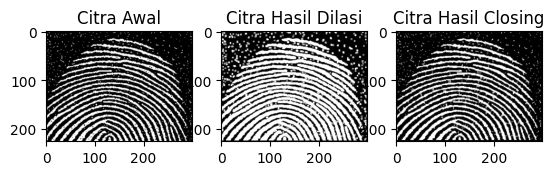

In [34]:
#Buatlah program implementasi operasi closing dengan Structuring Element berbentuk
#square 3 x 3 tanpa dan dengan menggunakan library morphology dari openCV,
#sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan gambar
#fingerprint.png) 

# Membaca image untuk operasi erosi
img6 = cv2.imread('/content/drive/MyDrive/PCVK/images/fingerprint.png', 0)

#Acquire size of the image
m, n= img6.shape

#Show the image
plt.imshow(img6, cmap="gray")

#Define new image to store the pixels of dilated image
imgDilate = np.zeros((p,q), dtype=np.uint8)

#Define the structuring element 
SED = np.ones((k,k), dtype=np.uint8)
constant1 = (k-1)//2

#Dilation operation without using inbuilt cv2 function
for i in range(constant1, p-constant1):
  for j in range(constant1,q-constant1):
    temp = img6[i-constant1:i+constant1+1, j-constant1:j+constant1+1]
    product = temp * SED
    imgDilate[i,j] = np.max(product)

#Read the image for dilation
img6_2 = imgDilate

#Acquire size of the image
m, n = img6_2.shape

#Show the image
plt.imshow(img6_2, cmap="gray")

# Define the structuring element
# k= 11,15,45 -Different sizes of the structuring element
k = 3
SE = np.ones((k,k), dtype=np.uint8)
constant = (k-1)//2

#Define new image
imgErode = np.zeros((m,n), dtype=np.uint8)

#Erosion without using inbuilt cv2 function for morphology
for i in range(constant, m-constant): #constant adalah tipe variable yang nilainya tidak dapat diubah
  for j in range(constant,n-constant):
    temp = img6_2[i-constant:i+constant+1, j-constant:j+constant+1] #temp digunakan untuk menampung atau menyimpan data untuk sementara
    product = temp * SE
    imgErode[i,j] = np.min(product)

plt.subplot(131),plt.imshow(img6, cmap="gray"),plt.title('Citra Awal')
plt.subplot(132),plt.imshow(imgDilate, cmap="gray"),plt.title('Citra Hasil Dilasi')
plt.subplot(133),plt.imshow(imgErode, cmap="gray"),plt.title('Citra Hasil Closing')# Membaca image untuk operasi erosi

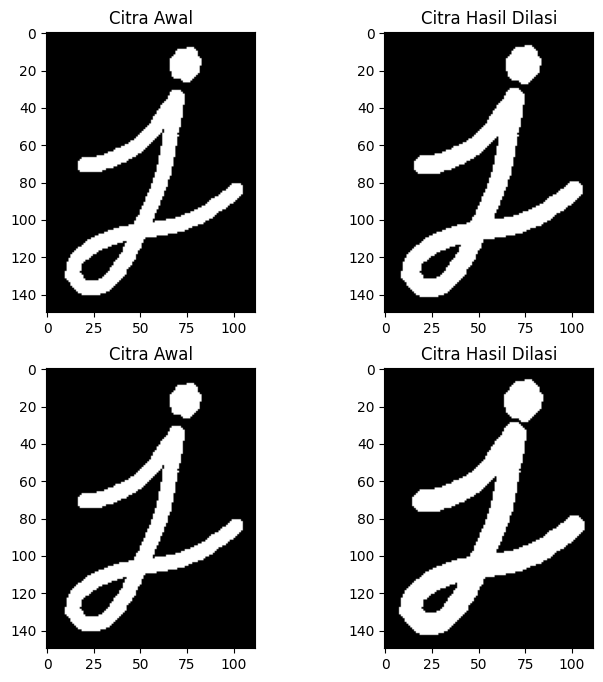

In [37]:
#Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
#Cross 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
#gambar j.png) 

# Load image
img9 = cv2.imread('/content/drive/MyDrive/PCVK/images/j.png')

# Define structuring element circular 3x3 and 5x5
kernel3 = cv2.getStructuringElement(cv2.MORPH_CROSS, (3,3))
kernel5 = cv2.getStructuringElement(cv2.MORPH_CROSS, (5,5))

# Dilate image with circular 3x3 kernel
dilation3 = cv2.dilate(img9, kernel3, iterations=1)

# Dilate image with circular 5x5 kernel
dilation5 = cv2.dilate(img9, kernel5, iterations=1)

# Show original image and dilated images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img9, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 1].imshow(dilation3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Dilasi')
axs[1, 0].imshow(img9, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 1].imshow(dilation5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Dilasi')
plt.show()

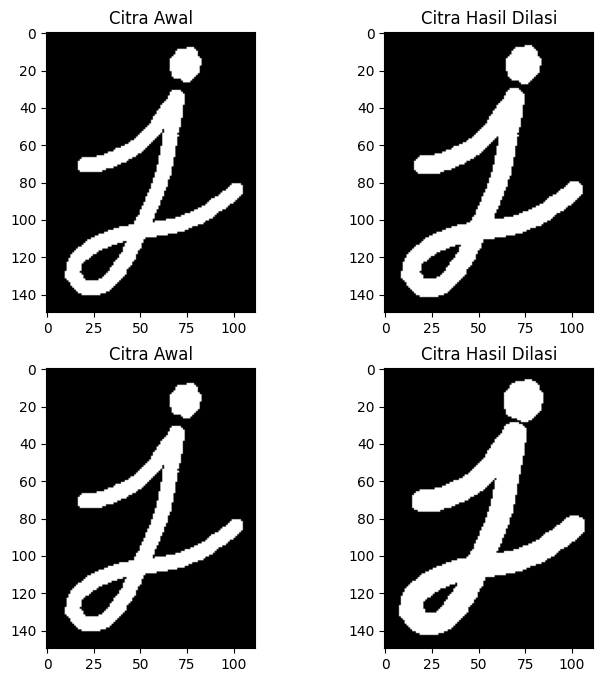

In [38]:
#Buatlah program implementasi operasi dilasi dengan Structuring Element berbentuk
#Circular 3 x 3 dan 5 x 5, sehingga menghasilkan tampilan seperti di bawah ini:
#(Gunakan gambar j.png)

# Load image
img9 = cv2.imread('/content/drive/MyDrive/PCVK/images/j.png')

# Define structuring element circular 3x3 and 5x5
kernel3 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3,3))
kernel5 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

# Dilate image with circular 3x3 kernel
dilation3 = cv2.dilate(img9, kernel3, iterations=1)

# Dilate image with circular 5x5 kernel
dilation5 = cv2.dilate(img9, kernel5, iterations=1)

# Show original image and dilated images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img9, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 1].imshow(dilation3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Dilasi')
axs[1, 0].imshow(img9, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 1].imshow(dilation5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Dilasi')
plt.show()

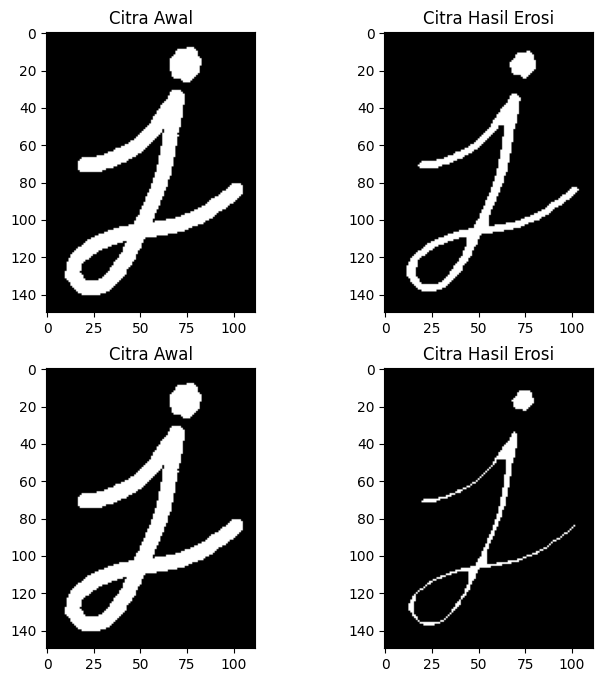

In [43]:
#Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
#Rectangle 3 x 5 dan 5 x 7, sehingga menghasilkan tampilan seperti di bawah ini:
#(Gunakan gambar j.png) 

# Load image
img9 = cv2.imread('/content/drive/MyDrive/PCVK/images/j.png')

# Define structuring element circular 3x3 and 5x5
kernel3 = cv2.getStructuringElement(cv2.MORPH_RECT, (3,5))
kernel5 = cv2.getStructuringElement(cv2.MORPH_RECT, (5,7))

# Dilate image with circular 3x3 kernel
erosion3 = cv2.erode(img9, kernel3, iterations = 1)

# Dilate image with circular 5x5 kernel
erosion5 = cv2.erode(img9, kernel5, iterations = 1)

# Show original image and dilated images
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
axs[0, 0].imshow(img9, cmap='gray')
axs[0, 0].set_title('Citra Awal')
axs[0, 1].imshow(erosion3, cmap='gray')
axs[0, 1].set_title('Citra Hasil Erosi')
axs[1, 0].imshow(img9, cmap='gray')
axs[1, 0].set_title('Citra Awal')
axs[1, 1].imshow(erosion5, cmap='gray')
axs[1, 1].set_title('Citra Hasil Erosi')
plt.show()

SE = Line Vertikal 5


(<Axes: title={'center': 'Citra Hasil Erosi'}>,
 Text(0.5, 1.0, 'Citra Hasil Erosi'))

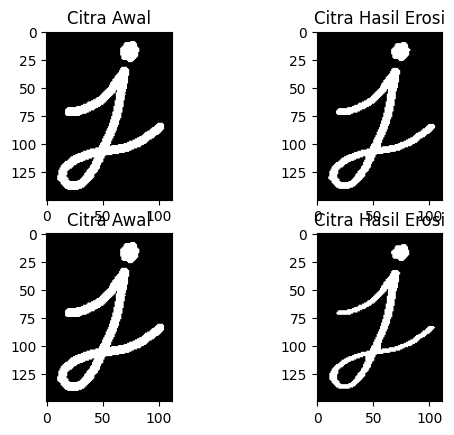

In [49]:
#Buatlah program implementasi operasi erosi dengan Structuring Element berbentuk
#Line Vertikal 3 dan 5, sehingga menghasilkan tampilan seperti di bawah ini: (Gunakan
#gambar j.png) 

# Load image
img9 = cv2.imread('/content/drive/MyDrive/PCVK/images/j.png')

kernel = np.ones((3,1),np.uint8) 
erosion = cv2.morphologyEx(img9, cv2.MORPH_ERODE, kernel)
kernel_2 = np.ones((5,1),np.uint8) 
erosion_2 = cv2.morphologyEx(img9, cv2.MORPH_ERODE, kernel_2)

print("SE = Line Vertikal 5")

plt.subplot(221), plt.imshow(img9, cmap='gray'), plt.title('Citra Awal') 
plt.subplot(222), plt.imshow(erosion, cmap='gray'), plt.title('Citra Hasil Erosi')
plt.subplot(223), plt.imshow(img9, cmap='gray'), plt.title('Citra Awal') 
plt.subplot(224), plt.imshow(erosion_2, cmap='gray'), plt.title('Citra Hasil Erosi')